## Data Cleaning with Pandas

*Author: Olalekan Fagbuyi*

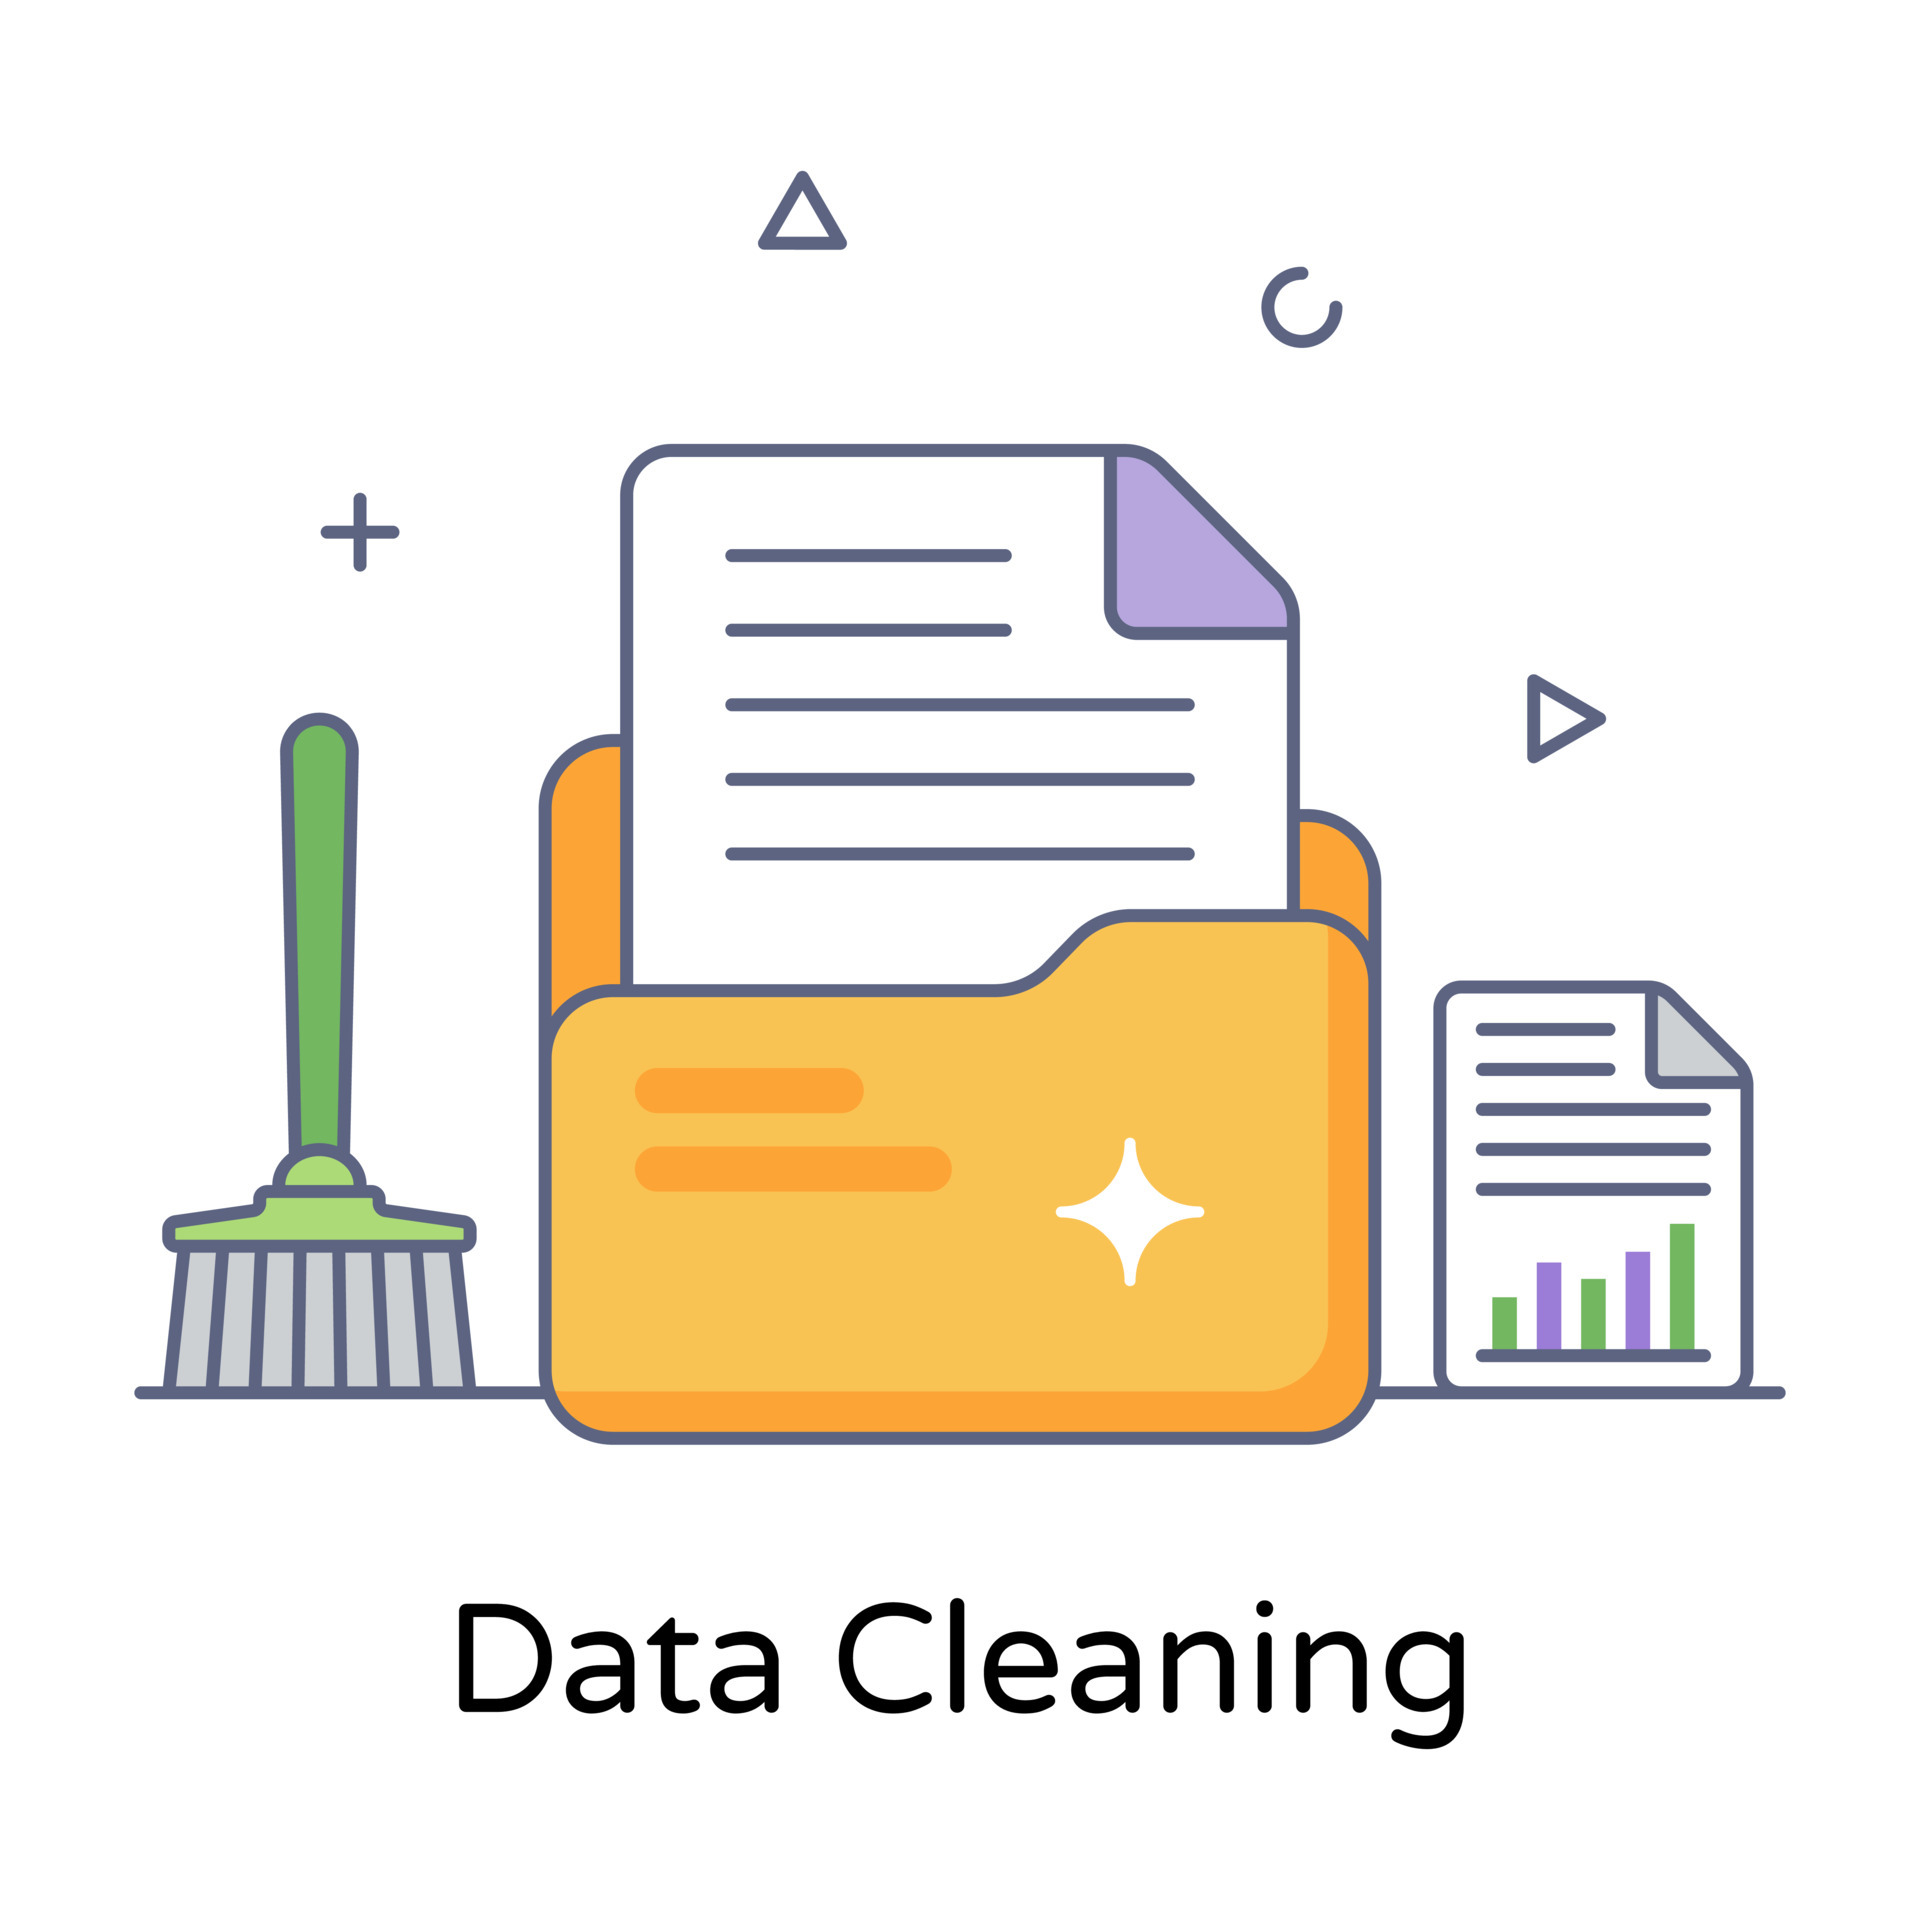

### Table of Contents

**1. Introduction**

**2. Loading Libraries and Importing Dataset**

**3. Exploratory Data Analysis**

**4. Dara Cleaning**

**5. Conclusion**

### 1.Introduction

**Data Cleaning** is a stage in the data preparation process that involves fixing errors, identifying inconsistencies, and generally improving the quality and reliability of data before it can be used for analysis. This process is carried out early in the analytics cycle before building advanced Machine Learning models or generating insights. If done properly, Data Cleaning improves the accuracy of decisions without compromising vital data, thereby avoiding the Garbage in Garbage out (GIGO) situation.

Data cleaning is a skillset analysts rarely get a chance to develop while learning becasue most of the online datasets are curated with little or not errors to work on. Most time we jump straight into analysis and on few occassions basic cleaning tasks like dropping duplicates and missing values are performed. However, this not the case with real-life datasets. It is often said that most o the analyst time (60 -80 percent) is spent on wrangling data. Hence the importance of this skillset. Manually cleaning data is a tedious process. However, the Python Pandas library has a range of techniques (methods) that help transform raw data to usable form in an efficient manner. These techniques have been applied in this project to convert the **dirty_data** dataframe to **clean_data**. 

In order to create a comprehensive data cleaning project, data used for this project was created from a combination of online datasets with each column edited to address common data cleaning issues like; changing datatypes, cleaning strings, changing column names, etc.

### 2. Importing Libraries and Loading Dataset

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Notebook Settings
pd.set_option('display.max_columns', None)
pd.get_option('max_colwidth')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
dirty_data = pd.read_excel("C:\\Users\\User\\Documents\\Python\\Data Cleaning.xlsx")

print(dirty_data.shape)
dirty_data.head(10)

(129, 11)


,Number,First_Name,Last_Name,Gender,Address,Active_Customer,Item_Purchased,Number_Purchased,Price,Order_Date,Method
0,1001,Kalila,Birtwistle,Female,"867 Willow St, Los Angeles, CA 90001",Yes,Bookcases,1,$35.46,2022-02-19 21:47:00,Card
1,1002,Norbert,Gotcher,Male,"657 Johnson St, San Francisco, CA 94016",Yes,Copiers,1,$229.72,2022-02-20 17:26:00,Card
2,1003,Cord,Warriner,M,"492 Walnut St, San Francisco, CA 94016",Yes,Chairs,2,$48.17,2022-02-01 22:00:00,Card
3,1004,Lorry,Booley,Female,"322 6th St, San Francisco, CA 94016",Yes,Phones,1,$584.82,2022-02-09 18:14:00,Card
4,1005,Nolie,Orring_,Female,"618 7th St, Los Angeles, CA 90001",Yes,Appliances,1,$64.7,2022-02-16 12:35:00,Card
5,1006,Leighton,Ebbles,Male,"512 Wilson St, San Francisco, CA 94016",Yes,Accessories,1,$41.8,2022-02-11 23:33:00,Card
6,1007,Cymbre,Janos,Female,"363 Spruce St, Austin, TX 73301",Yes,Chairs,1,$74.1,2022-02-03 09:46:00,Card
7,1008,Anna-diane,Preddle,Female,"440 Cedar St, Portland, OR 97035",Yes,Storage,1,$65.32,2022-02-16 16:52:00,Card
8,1009,Corissa,Zienkiewicz,F,"471 Center St, Los Angeles, CA 90001",Yes,Labels,1,$37.1,2022-02-03 22:21:00,Card
9,1010,Miller,Faloon,Male,"414 Walnut St, Boston, MA 02215",Yes,Art,1,$81.26,2022-02-09 08:28:00,Card


### 3. Exploratory Data Analysis (EDA)

Before carrying out any form of cleaning task, it is advisable to do some EDA to get a better understanding of the dataset. The EDA process draws attention to the columns that needs to clean on and also the cleaning methods requried.

‘Understanding the dataset’ refes to a couple of things including but not limited to:

* Extracting important variables and dropping unnecessary variables
* Identifying outliers, missing values
* Spotting human errors
* Understanding the relationships (Univarite and Bivariate) between variables

#### 3.1 Datatypes and Missing Values

In [3]:
#checking datatypes and missing values using df.info() method
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Number            129 non-null    int64         
 1   First_Name        129 non-null    object        
 2   Last_Name         129 non-null    object        
 3   Gender            129 non-null    object        
 4   Address           129 non-null    object        
 5   Active_Customer   129 non-null    object        
 6   Item_Purchased    129 non-null    object        
 7   Number_Purchased  129 non-null    int64         
 8   Price             126 non-null    object        
 9   Order_Date        129 non-null    datetime64[ns]
 10  Method            129 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 11.2+ KB


This method shows Price column as some **null values** while Order_Date column and Price are in the **wrong datatype**

#### 3.2 Duplicate Values

In [4]:
#Checking for duplicate values
print(dirty_data.duplicated().sum())

#Finding the duplicate row
duplicate_rows = dirty_data[dirty_data.duplicated()]
duplicate_rows

3


,Number,First_Name,Last_Name,Gender,Address,Active_Customer,Item_Purchased,Number_Purchased,Price,Order_Date,Method
26,1026,Nariko,Dummigan,Female,"649 Sunset St, Los Angeles, CA 90001",Yes,Paper,1,$14.51,2022-02-11 18:10:00,Cash
48,1047,Abra,Cuardall,Female,"789 Washington St, Los Angeles, CA 90001",Yes,Binders,1,$30.78,2022-02-19 09:23:00,Card
101,1100,Leigha,Bacchus,Female,"119 9th St, Seattle, WA 98101",Yes,Labels,1,$37.1,2022-02-09 17:32:00,Card


The df.duplicated() method shows there are 3 duplicate columns that needs to be cleaned in the next section

#### 3.3 Data Description

In [5]:
dirty_data.describe(include = 'all')

,Number,First_Name,Last_Name,Gender,Address,Active_Customer,Item_Purchased,Number_Purchased,Price,Order_Date,Method
count,129.000000,129,129,129,129,129,129,129.000000,126,129,129
unique,NaN,123,125,4,122,1,22,NaN,21,123,2
top,NaN,Leigha,Marina,Male,"119 9th St, Seattle, WA 98101",Yes,Art,NaN,$81.26,2022-02-02 08:25:00,Card
freq,NaN,2,2,61,2,129,17,NaN,17,2,121
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01 10:43:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28 18:30:00,NaN
mean,1063.651163,NaN,NaN,NaN,NaN,NaN,NaN,1.178295,NaN,NaN,NaN
std,36.766291,NaN,NaN,NaN,NaN,NaN,NaN,0.565266,NaN,NaN,NaN
min,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,1032.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


#### 3.4 Column Cardinility

In [6]:
#Checking cardinality of all columns in the df using nunique() method. unique() method works for single columns
dirty_data.nunique()

Number              126
First_Name          123
Last_Name           125
Gender                4
Address             122
Active_Customer       1
Item_Purchased       22
Number_Purchased      4
Price                21
Order_Date          123
Method                2
dtype: int64

Text(0.5, 1.0, 'Cardinality')

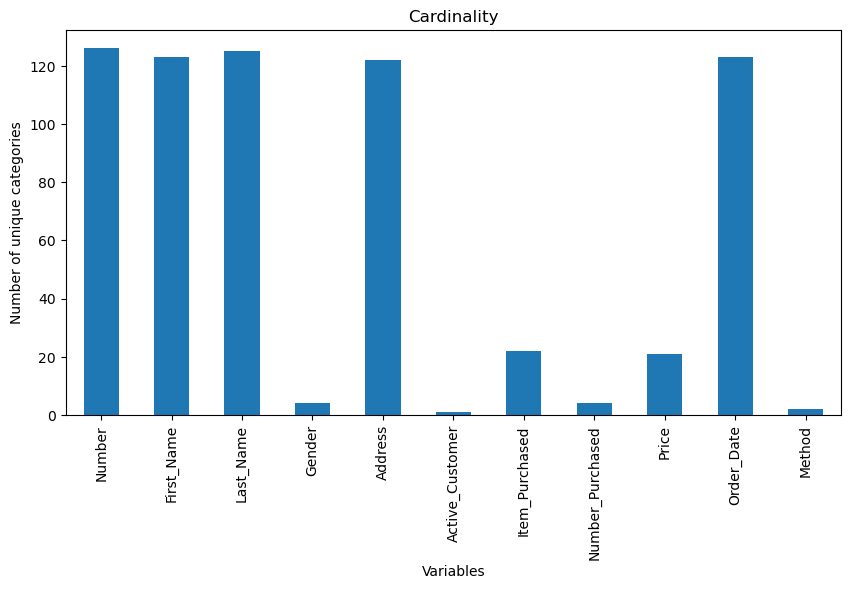

In [7]:
#Visualizing cardinality of columns
dirty_data.nunique().plot.bar(figsize=(10,5))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

The nunique() method counts the unique values of each feature in the dataframe. Gender, Active_Customers, Numbers_Purchased and Method columns have low cardinality. A further investigation of these columns needs to be carried out to determine if they provide useful information.

In [8]:
#Getting unique values in low cardinal columns
print(dirty_data['Gender'].unique())
print(dirty_data['Active_Customer'].unique())
print(dirty_data['Number_Purchased'].unique())
print(dirty_data['Method'].unique())

['Female' 'Male' 'M' 'F']
['Yes']
[1 2 3 5]
['Card' 'Cash']


The unique() method gives a better idea of cleaning to be done on the Gender column. It also shows the Active_Customer column contains little or no information needed for Card transaction analysis.

In [9]:
print(dirty_data['Gender'].value_counts())
print(dirty_data['Active_Customer'].value_counts())
print(dirty_data['Number_Purchased'].value_counts())
print(dirty_data['Method'].value_counts())

Male      61
Female    56
M          7
F          5
Name: Gender, dtype: int64
Yes    129
Name: Active_Customer, dtype: int64
1    114
2      9
3      5
5      1
Name: Number_Purchased, dtype: int64
Card    121
Cash      8
Name: Method, dtype: int64


### 4. Data Cleaning

After getting a better overview of the dataset from the EDA section, this section focuses on applying data cleaning techniques to covert the original dataset (dirty_data) into a quality data that can be used for decision making.

Data is said to have quality if it fufils the following criteria;

* Accuracy : Data reflects real world objects, events and scenarios and are sourced from verifiable source(s)

* Completeness : Data has the ability to delivers complusory/required values successfully

* Consistency : Data is unifrom across all datasets with no conflicting measurements

* Uniqueness : No duplicate, redundant, or overlapping records exists across the dataset

* Validity: Data is collected in accepted formats and they fall within the proper range as defined by the organizatons rules and parameters.

#### 4.1 Dropping Column(s)

In [10]:
dirty_data.drop(['Active_Customer'], axis = 1, inplace = True)

print(dirty_data.shape)
dirty_data.head()

(129, 10)


,Number,First_Name,Last_Name,Gender,Address,Item_Purchased,Number_Purchased,Price,Order_Date,Method
0,1001,Kalila,Birtwistle,Female,"867 Willow St, Los Angeles, CA 90001",Bookcases,1,$35.46,2022-02-19 21:47:00,Card
1,1002,Norbert,Gotcher,Male,"657 Johnson St, San Francisco, CA 94016",Copiers,1,$229.72,2022-02-20 17:26:00,Card
2,1003,Cord,Warriner,M,"492 Walnut St, San Francisco, CA 94016",Chairs,2,$48.17,2022-02-01 22:00:00,Card
3,1004,Lorry,Booley,Female,"322 6th St, San Francisco, CA 94016",Phones,1,$584.82,2022-02-09 18:14:00,Card
4,1005,Nolie,Orring_,Female,"618 7th St, Los Angeles, CA 90001",Appliances,1,$64.7,2022-02-16 12:35:00,Card


**Active_Customer** column is dropped because it offers little or no information for analysis since all customers listed are active.

#### 4.2 Duplicate Values

In [11]:
dirty_data.drop_duplicates(keep = 'first', inplace = True)
print(dirty_data.shape)

(126, 10)


3 duplicate values identified in section 3.2 have now been dropped meaning dataset shape changes from 129 rows to 126

#### 4.3 Changing Column Names

It is good practice to replace column names to easily recalled/appropriate names during the data cleaning phase. The Number, Number_Purchased, and Method columns were changed to Customer_Id, Quantity and Payment_Method respectively using the rename() method.

In [12]:
dirty_data.rename(columns = {'Number':'Customer_Id', 'Number_Purchased':'Quantity', 'Method' : 'Payment_Method'}, inplace = True)
dirty_data

,Customer_Id,First_Name,Last_Name,Gender,Address,Item_Purchased,Quantity,Price,Order_Date,Payment_Method
0,1001,Kalila,Birtwistle,Female,"867 Willow St, Los Angeles, CA 90001",Bookcases,1,$35.46,2022-02-19 21:47:00,Card
1,1002,Norbert,Gotcher,Male,"657 Johnson St, San Francisco, CA 94016",Copiers,1,$229.72,2022-02-20 17:26:00,Card
2,1003,Cord,Warriner,M,"492 Walnut St, San Francisco, CA 94016",Chairs,2,$48.17,2022-02-01 22:00:00,Card
3,1004,Lorry,Booley,Female,"322 6th St, San Francisco, CA 94016",Phones,1,$584.82,2022-02-09 18:14:00,Card
4,1005,Nolie,Orring_,Female,"618 7th St, Los Angeles, CA 90001",Appliances,1,$64.7,2022-02-16 12:35:00,Card
...,...,...,...,...,...,...,...,...,...,...
124,1123,Leana,Bailey,Female,"20 Dogwood St, New York City, NY 10001",Envelopes,1,$12.56,2022-02-25 18:00:00,Card
125,1124,John,Martins,Male,"20 Dogwood St, New York City, NY 10001",storage,1,$33.75,2022-02-17 18:45:00,Card
126,1125,Hannah,Berry,Female,"803 Church St, Seattle, WA 98101",Furnishings,2,$75.23,2022-02-03 18:22:00,Card
127,1126,Joyce,Majors,Female,"23 13th St, San Francisco, CA 94016",Appliances,1,$64.7,2022-02-16 13:50:00,Card


#### 4.4 Cleaning Strings

Texts(Strings) are cleaned in several columns to make data more meaningful and uniform.

* str.strip() method is used to remove unwanted strings (_,/, ** ,..,//) in the First_Name and Last_Name columns
* replace() method is used to change M and F to Male and Female values in the Gender column to allow for uniformity of values
* str.replace() method is used to remove the $ sign in the Price column
* str.title() method is used to standardize the format of values in the Item_Purchased column

In [13]:
#Stripping unwanted strings from First_Name and Last_Name columns
dirty_data['First_Name'] = dirty_data['First_Name'].str.strip("_/**..//")
dirty_data['Last_Name'] = dirty_data['Last_Name'].str.strip("_/**..//")                            

#Inputting appropriate values in Gender column
dirty_data = dirty_data.replace({'Gender': {'M': 'Male',  'F': 'Female'}})

#Stripping out the $ sign from prices in the Pricing column
dirty_data['Price'] = dirty_data['Price'].str.replace('$','')

#Making all string uniform in Item_Purchased column
dirty_data['Item_Purchased'] = dirty_data['Item_Purchased'].str.title()

In [14]:
dirty_data

,Customer_Id,First_Name,Last_Name,Gender,Address,Item_Purchased,Quantity,Price,Order_Date,Payment_Method
0,1001,Kalila,Birtwistle,Female,"867 Willow St, Los Angeles, CA 90001",Bookcases,1,35.46,2022-02-19 21:47:00,Card
1,1002,Norbert,Gotcher,Male,"657 Johnson St, San Francisco, CA 94016",Copiers,1,229.72,2022-02-20 17:26:00,Card
2,1003,Cord,Warriner,Male,"492 Walnut St, San Francisco, CA 94016",Chairs,2,48.17,2022-02-01 22:00:00,Card
3,1004,Lorry,Booley,Female,"322 6th St, San Francisco, CA 94016",Phones,1,584.82,2022-02-09 18:14:00,Card
4,1005,Nolie,Orring,Female,"618 7th St, Los Angeles, CA 90001",Appliances,1,64.7,2022-02-16 12:35:00,Card
...,...,...,...,...,...,...,...,...,...,...
124,1123,Leana,Bailey,Female,"20 Dogwood St, New York City, NY 10001",Envelopes,1,12.56,2022-02-25 18:00:00,Card
125,1124,John,Martins,Male,"20 Dogwood St, New York City, NY 10001",Storage,1,33.75,2022-02-17 18:45:00,Card
126,1125,Hannah,Berry,Female,"803 Church St, Seattle, WA 98101",Furnishings,2,75.23,2022-02-03 18:22:00,Card
127,1126,Joyce,Majors,Female,"23 13th St, San Francisco, CA 94016",Appliances,1,64.7,2022-02-16 13:50:00,Card


#### 4.5 Changing Datatypes

As shown in section 3.1, Price and Order_Date columns are currently in the wrong datatype. They should be float and datetime datatypes respectively and not object. That will be corrected in this section. 

In [15]:
#Changing Price column from object to float
dirty_data['Price'] = pd.to_numeric(dirty_data['Price'])

#Changing Order_Date column from object to datetime
dirty_data['Order_Date'] = pd.to_datetime(dirty_data['Order_Date'])

dirty_data.dtypes

Customer_Id                int64
First_Name                object
Last_Name                 object
Gender                    object
Address                   object
Item_Purchased            object
Quantity                   int64
Price                    float64
Order_Date        datetime64[ns]
Payment_Method            object
dtype: object

Columns now in correct datatypes

#### 4.6 Missing Values

The price column has 3 missing values as demonstration by the df.info() method applied in section 3.1. There are different ways of handling missing values in a dataframe. They can be removed using the **dropna()** or replaced using the **fillna()**, **replace()** or **interpolate()** methods. 

The fillna() method is used in this data cleaning project. The shape (skewness) of the data is used in determing the measure of central tendency (mean, median, mode) imputted into the dataset. 

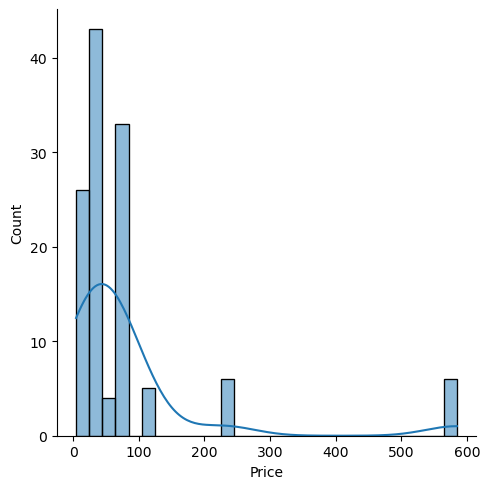

In [16]:
sns.displot(data=dirty_data, x='Price', kde=True)
plt.show()

The **Price_Column** has a right(positive) skew. In this case the median is the selected measure of central tendency.

In [17]:
dirty_data['Price'].median()

37.74

In [18]:
dirty_data['Price'] = dirty_data['Price'].fillna(dirty_data['Price'].median())

In [19]:
dirty_data.isnull().sum()

Customer_Id       0
First_Name        0
Last_Name         0
Gender            0
Address           0
Item_Purchased    0
Quantity          0
Price             0
Order_Date        0
Payment_Method    0
dtype: int64

No more missing data in the Price column.

#### 4.7 Creating New Columns (Feature Engineering)

While cleaning data, it is also possible to combine existing features into features that better represent the underlying problem in order to improve analysis accuracy. This process is know as Feature Engineering.

For this project, Quantity and Price columns were combined to create the Revenue column. This new columns helps in better analyzing sales.

In [20]:
#Creating Revenue Column
dirty_data['Revenue'] = dirty_data['Quantity'] * dirty_data['Price'] 
dirty_data.head()

,Customer_Id,First_Name,Last_Name,Gender,Address,Item_Purchased,Quantity,Price,Order_Date,Payment_Method,Revenue
0,1001,Kalila,Birtwistle,Female,"867 Willow St, Los Angeles, CA 90001",Bookcases,1,35.46,2022-02-19 21:47:00,Card,35.46
1,1002,Norbert,Gotcher,Male,"657 Johnson St, San Francisco, CA 94016",Copiers,1,229.72,2022-02-20 17:26:00,Card,229.72
2,1003,Cord,Warriner,Male,"492 Walnut St, San Francisco, CA 94016",Chairs,2,48.17,2022-02-01 22:00:00,Card,96.34
3,1004,Lorry,Booley,Female,"322 6th St, San Francisco, CA 94016",Phones,1,584.82,2022-02-09 18:14:00,Card,584.82
4,1005,Nolie,Orring,Female,"618 7th St, Los Angeles, CA 90001",Appliances,1,64.70,2022-02-16 12:35:00,Card,64.70


#### 4.8 Merging Columns

At times columns are merged as they add more value to analysing when they are together rather than when they are separate. First_Name and Last_Name columns were merged to form the Customer_Name column. The original columns were then dropped as they were no longer required.

In [21]:
#Merging First_Name and Last_Name columns
dirty_data['Customer_Name'] = dirty_data['First_Name'].map(str) + ' ' + dirty_data['Last_Name'].map(str)
dirty_data = dirty_data.drop(columns = ['First_Name', 'Last_Name' ], axis = 1)

dirty_data.head()

,Customer_Id,Gender,Address,Item_Purchased,Quantity,Price,Order_Date,Payment_Method,Revenue,Customer_Name
0,1001,Female,"867 Willow St, Los Angeles, CA 90001",Bookcases,1,35.46,2022-02-19 21:47:00,Card,35.46,Kalila Birtwistle
1,1002,Male,"657 Johnson St, San Francisco, CA 94016",Copiers,1,229.72,2022-02-20 17:26:00,Card,229.72,Norbert Gotcher
2,1003,Male,"492 Walnut St, San Francisco, CA 94016",Chairs,2,48.17,2022-02-01 22:00:00,Card,96.34,Cord Warriner
3,1004,Female,"322 6th St, San Francisco, CA 94016",Phones,1,584.82,2022-02-09 18:14:00,Card,584.82,Lorry Booley
4,1005,Female,"618 7th St, Los Angeles, CA 90001",Appliances,1,64.70,2022-02-16 12:35:00,Card,64.70,Nolie Orring


#### 4.9 Extracting Information from Columns

Columns somethings contains more information than required, the necessary informatin will need to be extracted using some Pandas methods.

For the dirty_data dataset, **Address** and **Order_Date** columns will be cleaned by extracting the required information.

In [22]:
#Extracting date and time of Order from the Order_Date column
dirty_data['Order_Day'] = pd.to_datetime(dirty_data['Order_Date']).dt.date
dirty_data['Order_Time'] = pd.to_datetime(dirty_data['Order_Date']).dt.time

In [23]:
#Extracting City, State and Post Code from the Address Column
dirty_data[['Street_Address', 'City', 'State_Zip_Code']] = dirty_data['Address'].str.split(',',2, expand = True)

dirty_data[['Space','State_Code', 'Zip']] = dirty_data['State_Zip_Code'].str.split(' ', 2, expand = True)

dirty_data.head()

,Customer_Id,Gender,Address,Item_Purchased,Quantity,Price,Order_Date,Payment_Method,Revenue,Customer_Name,Order_Day,Order_Time,Street_Address,City,State_Zip_Code,Space,State_Code,Zip
0,1001,Female,"867 Willow St, Los Angeles, CA 90001",Bookcases,1,35.46,2022-02-19 21:47:00,Card,35.46,Kalila Birtwistle,2022-02-19,21:47:00,867 Willow St,Los Angeles,CA 90001,,CA,90001
1,1002,Male,"657 Johnson St, San Francisco, CA 94016",Copiers,1,229.72,2022-02-20 17:26:00,Card,229.72,Norbert Gotcher,2022-02-20,17:26:00,657 Johnson St,San Francisco,CA 94016,,CA,94016
2,1003,Male,"492 Walnut St, San Francisco, CA 94016",Chairs,2,48.17,2022-02-01 22:00:00,Card,96.34,Cord Warriner,2022-02-01,22:00:00,492 Walnut St,San Francisco,CA 94016,,CA,94016
3,1004,Female,"322 6th St, San Francisco, CA 94016",Phones,1,584.82,2022-02-09 18:14:00,Card,584.82,Lorry Booley,2022-02-09,18:14:00,322 6th St,San Francisco,CA 94016,,CA,94016
4,1005,Female,"618 7th St, Los Angeles, CA 90001",Appliances,1,64.70,2022-02-16 12:35:00,Card,64.70,Nolie Orring,2022-02-16,12:35:00,618 7th St,Los Angeles,CA 90001,,CA,90001


#### 4.10 Rearranging Columns

After performing all the cleaning tasks, a couple of columns have been displaced. The last step taken in this project is to rearrange columns closer to their original order and also drop some unneccesary columns.

This step will be carried out by creating a new df called **clean_data** and selecting only required columns from the old df **dirty_data**

In [24]:
clean_data = dirty_data[['Customer_Id', 'Customer_Name', 'Gender', 'Street_Address', 'City','State_Code', 'Zip',
                         'Order_Day', 'Order_Time', 'Item_Purchased', 'Payment_Method', 'Price', 'Quantity', 'Revenue']]

print(clean_data.shape)
clean_data.head(10)

(126, 14)


,Customer_Id,Customer_Name,Gender,Street_Address,City,State_Code,Zip,Order_Day,Order_Time,Item_Purchased,Payment_Method,Price,Quantity,Revenue
0,1001,Kalila Birtwistle,Female,867 Willow St,Los Angeles,CA,90001,2022-02-19,21:47:00,Bookcases,Card,35.46,1,35.46
1,1002,Norbert Gotcher,Male,657 Johnson St,San Francisco,CA,94016,2022-02-20,17:26:00,Copiers,Card,229.72,1,229.72
2,1003,Cord Warriner,Male,492 Walnut St,San Francisco,CA,94016,2022-02-01,22:00:00,Chairs,Card,48.17,2,96.34
3,1004,Lorry Booley,Female,322 6th St,San Francisco,CA,94016,2022-02-09,18:14:00,Phones,Card,584.82,1,584.82
4,1005,Nolie Orring,Female,618 7th St,Los Angeles,CA,90001,2022-02-16,12:35:00,Appliances,Card,64.70,1,64.70
5,1006,Leighton Ebbles,Male,512 Wilson St,San Francisco,CA,94016,2022-02-11,23:33:00,Accessories,Card,41.80,1,41.80
6,1007,Cymbre Janos,Female,363 Spruce St,Austin,TX,73301,2022-02-03,09:46:00,Chairs,Card,74.10,1,74.10
7,1008,Anna-diane Preddle,Female,440 Cedar St,Portland,OR,97035,2022-02-16,16:52:00,Storage,Card,65.32,1,65.32
8,1009,Corissa Zienkiewicz,Female,471 Center St,Los Angeles,CA,90001,2022-02-03,22:21:00,Labels,Card,37.10,1,37.10
9,1010,Miller Faloon,Male,414 Walnut St,Boston,MA,02215,2022-02-09,08:28:00,Art,Card,81.26,1,81.26


### 5. Conclusion

After all the cleaning procedures have been performed, the final step is saving the file for future use. It is advisable to keep the initial file (dirty_data) in its original form for future reference. 

Lastly, it is of importance to note that there are several other data cleaning methods apart from those used in this project. Each dataset is different, and the EDA process (Section 3) gives an idea of cleaning procedures to be applied.

In [25]:
#Saving new df for further analysis
clean_data.to_csv('clean_data.csv', index = False)